<a href="https://colab.research.google.com/github/syedfquadri/test/blob/main/IMDB_WithoutSelenium_SyedFalahuddinQuadri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scrapping IMDB
##### Author: Syed Falahuddin Quadri
> Without Selenium

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time

import random

In [ ]:
def convert_to_number(value):
    multiplier=1
    if 'K' in value:
      multiplier=1e3  # 1000
      value=value.replace('K', '')
    elif 'M' in value:
      multiplier=1e6  # 1000000
      value=value.replace('M', '')
    return float(value)*multiplier

In [ ]:
header={"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36 Edg/119.0.0.0"}
df=pd.DataFrame(columns=["Movie","Year","IMDB Ratings", "Metascore", "Votes"])
year_list=[i for i in range(2010,2021)]
# month_list=[j for j in range(1,12)]
for year in (year_list):
  # for month in month_list:
  res=r.get(f"https://www.imdb.com/search/title/?title_type=feature&release_date={year}-01-01,{year}-12-31" ,headers=header)
  if res.status_code==200:
    soup=bs(res.text,"html.parser")
    MoviesContainers=soup.find_all("li", {"class": "ipc-metadata-list-summary-item"})
    print(f"{len(MoviesContainers)} Movie Containers in the year {year}")
    # print(f"{len(MoviesContainers)} Movie Containers in the year {year} and month {month}")
    sleep_time=random.randint(8,15)
    print(f"Forced Sleep For {sleep_time} Seconds. ZZZzzzzz...")
    # time.sleep(sleep_time)
    for container in MoviesContainers:
      if container.find_all("span", class_= "metacritic-score-box")!=[]:
        metaScore=container.find_all("span", class_= "metacritic-score-box")[0].contents[0]
        title=container.find("h3",class_="ipc-title__text").contents[0].split(" ",1)[-1]
        voteCount=container.find("span", class_= "ipc-rating-star--voteCount").contents[2]
        imdbRating=container.find("span", class_= "ipc-rating-star--voteCount").find_previous_sibling(string=True)
        year=container.find("span", class_= "dli-title-metadata-item").contents[0]
        df_row=pd.Series({
            "Movie":str(title),
            "Year":int(year),
            "IMDB Ratings":float(imdbRating),
            "Metascore":int(metaScore),
            "Votes":convert_to_number(voteCount)
        })
        df=pd.concat([df,df_row.to_frame().T])
  else:
    print(f"Response Status Code: {res.status_code}, Reason: {res.text}")

  0%|          | 0/11 [00:00<?, ?it/s]

50 Movie Containers in the year 2010
Forced Sleep For 8 Seconds. ZZZzzzzz...
50 Movie Containers in the year 2011
Forced Sleep For 12 Seconds. ZZZzzzzz...
50 Movie Containers in the year 2012
Forced Sleep For 8 Seconds. ZZZzzzzz...
50 Movie Containers in the year 2013
Forced Sleep For 11 Seconds. ZZZzzzzz...
50 Movie Containers in the year 2014
Forced Sleep For 11 Seconds. ZZZzzzzz...
50 Movie Containers in the year 2015
Forced Sleep For 9 Seconds. ZZZzzzzz...
50 Movie Containers in the year 2016
Forced Sleep For 8 Seconds. ZZZzzzzz...
50 Movie Containers in the year 2017
Forced Sleep For 10 Seconds. ZZZzzzzz...
50 Movie Containers in the year 2018
Forced Sleep For 10 Seconds. ZZZzzzzz...
50 Movie Containers in the year 2019
Forced Sleep For 14 Seconds. ZZZzzzzz...
50 Movie Containers in the year 2020
Forced Sleep For 9 Seconds. ZZZzzzzz...


In [ ]:
df

,Movie,Year,IMDB Ratings,Metascore,Votes
0,Scott Pilgrim vs. the World,2010,7.5,69,454000.0
0,Inception,2010,8.8,74,2500000.0
0,Legion,2010,5.3,32,110000.0
0,The Social Network,2010,7.8,95,742000.0
0,Shutter Island,2010,8.2,63,1400000.0
...,...,...,...,...,...
0,Borat Subsequent Moviefilm,2020,6.6,68,150000.0
0,Greenland,2020,6.4,64,128000.0
0,I Care a Lot,2020,6.4,66,142000.0
0,Let Him Go,2020,6.7,63,34000.0


In [ ]:
df.to_csv("imdbScrapped.csv")

In [ ]:
average_scores_per_year = df.groupby('Year').agg({'Metascore': 'mean', 'IMDB Ratings': 'mean'}).reset_index()
average_scores_per_year

,Year,Metascore,IMDB Ratings
0,2010,59.937500,6.931250
1,2011,64.833333,7.020833
2,2012,65.612245,7.104082
3,2013,61.959184,6.920408
4,2014,62.979592,7.059184
5,2015,64.021277,6.914894
6,2016,64.791667,7.129167
7,2017,63.333333,6.929167
8,2018,63.744681,6.951064
9,2019,64.479167,7.029167


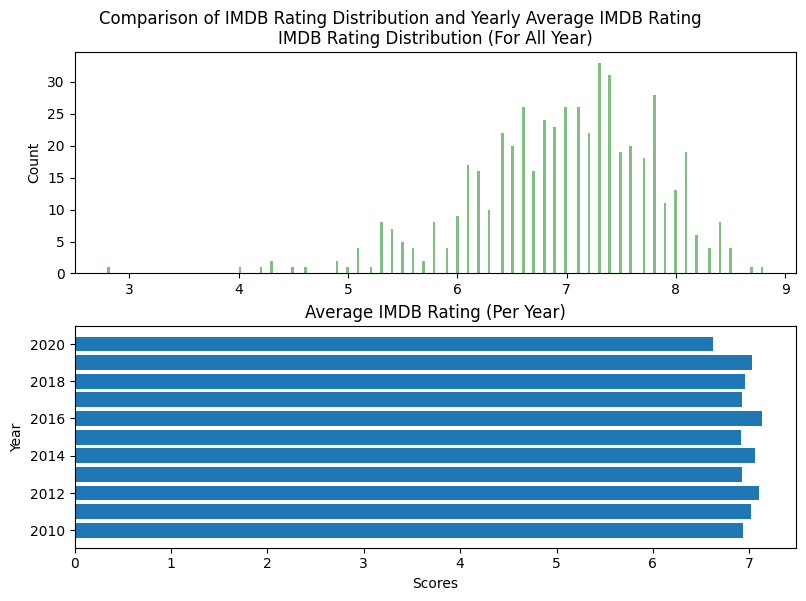

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.hist(df['IMDB Ratings'], bins=250, alpha=0.5, color='green')
ax1.set_title('IMDB Rating Distribution (For All Year)')
ax1.set_ylabel("Count")
ax2.barh(average_scores_per_year['Year'],average_scores_per_year['IMDB Ratings'],align='center')
ax2.set_title('Average IMDB Rating (Per Year)')
ax2.set_ylabel("Year")

fig.suptitle('Comparison of IMDB Rating Distribution and Yearly Average IMDB Rating ')
plt.xlabel('Scores')
fig.tight_layout(pad=0.5)
plt.show()

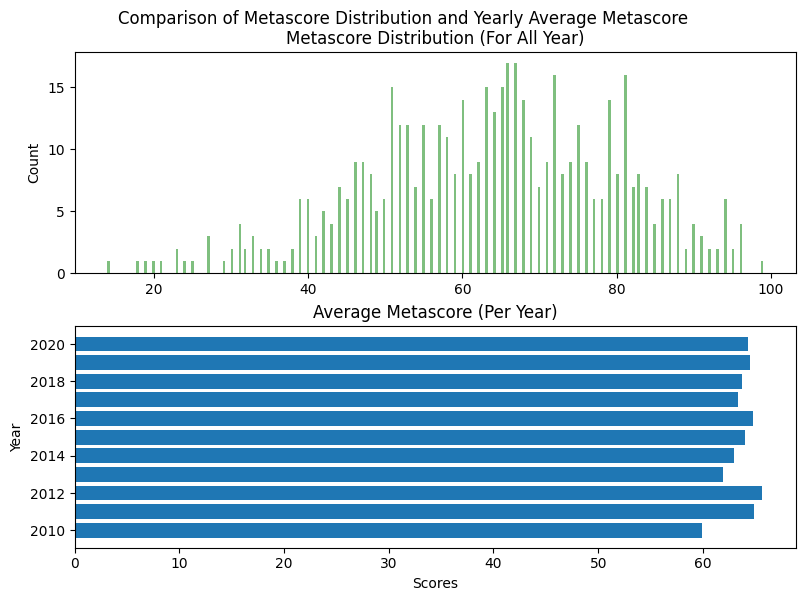

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.hist(df['Metascore'], bins=250, alpha=0.5, color='green')
ax1.set_title('Metascore Distribution (For All Year)')
ax1.set_ylabel("Count")
ax2.barh(average_scores_per_year['Year'],average_scores_per_year['Metascore'],align='center')
ax2.set_title('Average Metascore (Per Year)')
ax2.set_ylabel("Year")

fig.suptitle('Comparison of Metascore Distribution and Yearly Average Metascore')
plt.xlabel('Scores')
fig.tight_layout(pad=0.5)
plt.show()